# Part II: Road Lane Detection Using Hough Transform

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [67]:
def find_edges(img,th1,th2):
    grayscale = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    denoised = cv2.medianBlur(grayscale,5)
    canny = cv2.Canny(denoised,th1,th2)
    return canny

In [68]:
def roi(img):
    height,width = img.shape[:2]
    roi_bottom_left = (0, height)  
    roi_top_left = (0, height * 0.5)
    roi_top_right = (width * 0.6, height * 0.45)
    roi_bottom_right = (width * 0.9, height)
    
    vertices = np.array([[roi_bottom_left, roi_top_left, roi_top_right, roi_bottom_right]], dtype=np.int32)
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, (255, 255, 255)) 
    roi_img = cv2.bitwise_and(img, mask)
    
    return roi_img

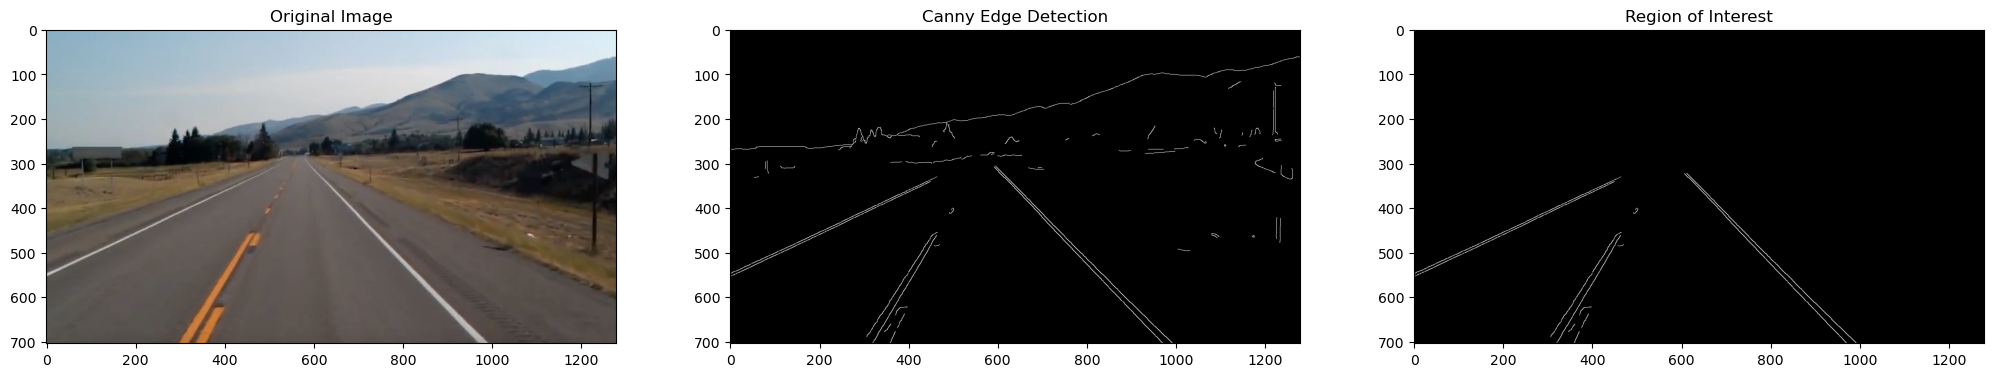

In [75]:
img = cv2.cvtColor(cv2.imread('lane_1.jpg'),cv2.COLOR_BGR2RGB)
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Original Image')

canny = find_edges(img,100,170)
plt.subplot(1,3,2)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')

roi_img = roi(canny)
plt.subplot(1,3,3)
plt.imshow(roi_img, cmap='gray')
plt.title('Region of Interest')
plt.show()